# MAJOR PROJECT 

# PROBLEM STATEMENT - Create a classification model to predict the sentiment either (Positive or Negative) based on Covid Tweets.

In [53]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re 
import pandas as pd 
import string
import nltk 
from nltk.stem.porter import *
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("Corona_NLP.csv",encoding='latin-1')

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [8]:
df.shape


(41157, 6)

In [9]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

# REMOVING NULL VALUES 

In [10]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
df["Location"]=df["Location"].fillna('U')
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

# EXPLORING THE DATA 

In [12]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,U,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative


In [13]:
df['Location'].value_counts()

U                               8592
London                           540
United States                    528
London, England                  520
New York, NY                     395
                                ... 
Staffordshire Moorlands            1
Kithchener ON                      1
Tulsa, Ok                          1
Watford, South Oxhey, Bushey       1
i love you so much || he/him       1
Name: Location, Length: 12220, dtype: int64

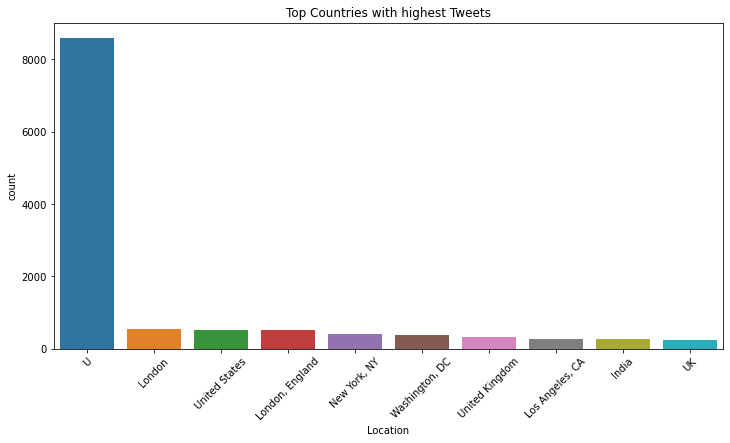

In [14]:
plt.figure(figsize=(12,6))
plt.title('Top Countries with highest Tweets')
countries =sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index[:10])
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 


In [15]:
# HERE 'U' IS THE UNKNOWN

In [16]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

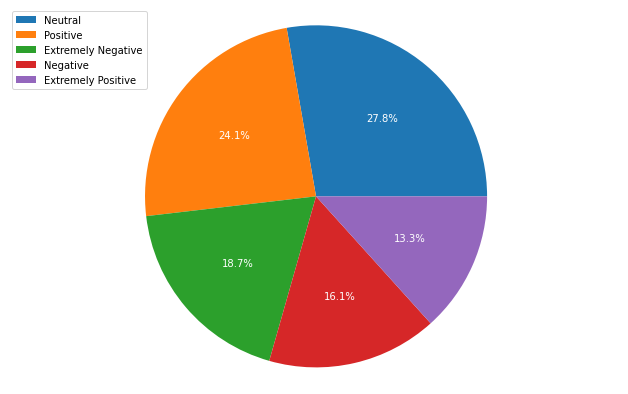

In [17]:
plt.figure(figsize=(11,7))
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

In [18]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

# DATA PROCESSING 

# A) Removing @ ,http// , urls , puntuation , umbers , special characters


In [19]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [20]:
import re
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

# B) Tokenization words

In [21]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

# C) Convert words to lower case

In [22]:
df["Tweet"] = df["Tweet"].str.lower()

# D) Removing Stop words

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZkaiTr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [25]:
df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                                                                                            [ ]
1        [v, c, e,  , l, k,  ,  , u, r,  , n, e, g, h, b, u, r,  , f, l,  ,  , e, x, c, h, n, g, e,  , p, h, n, e,  , n, u, b, e, r,  , c, r, e, e,  , c, n, c,  , l,  , w, h,  , p, h, n, e,  , n, u, b, e, ...
2                                       [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, h,  ,  , g, v, e,  , e, l, e, r, l,  , b, l, e,  , e, c, e,  , h, p, p, n, g,  , h, u, r,  ,  , c, v,  , u, b, r, e, k,  ]
3        [ , f,  , c, k,  ,  , n,  , h, e,  , n, l,  , n, e,  , w, h, c, h,  ,  , e, p,  , p, l, e, e,  , n,  ,  , p, n, c,  , h, e, r, e,  , w, l, l,  , b, e,  , e, n, u, g, h,  , f,  , f, r,  , e, v, e, ...
4        [e,  , r, e,  ,  , g,  ,  , u, p, e, r, r, k, e,  , u, r, n, g,  , h, e,  , #, c, v,  , u, b, r, e, k,  , n,  , b, e, c, u, e,  ,  ,  , p, r, n,  , b, u,  

# E) Stemming words

In [26]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [27]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [28]:
df['Tweet']  = tokenized_tweet

In [29]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advic talk to your neighbour famili to exchang phone number creat contact list with phone number of neighbour school employ chemist gp set up onlin shop account if poss adequ suppli of regular med...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronaviru australia woolworth to give elderli disabl dedic shop hour amid covid outbreak
3,3802,48754,U,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,my food stock is not the onli one which is empti pleas don t panic there will be enough food for everyon if you do not take more than you need stay calm stay safe #covid franc #covid #covid #coron...
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative,me readi to go at supermarket dure the #covid outbreak not becaus i m paranoid but becaus my food stock is litterali empti the #coronaviru is a seriou thing but pleas don t panic it caus shortag #...


# Convert the 'Extremely Positive' and 'Extremely Negative' Sentiments to 'Positive' and 'Negative' sentiments respectively

In [30]:
SentimentMapped= {
    'Extremely Negative': 0,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Extremely Positive': 2
}
df['Sentiment']=df['Sentiment'].map(lambda x:SentimentMapped[x])

In [31]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,1,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,2,advic talk to your neighbour famili to exchang phone number creat contact list with phone number of neighbour school employ chemist gp set up onlin shop account if poss adequ suppli of regular med...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",2,coronaviru australia woolworth to give elderli disabl dedic shop hour amid covid outbreak
3,3802,48754,U,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",2,my food stock is not the onli one which is empti pleas don t panic there will be enough food for everyon if you do not take more than you need stay calm stay safe #covid franc #covid #covid #coron...
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",0,me readi to go at supermarket dure the #covid outbreak not becaus i m paranoid but becaus my food stock is litterali empti the #coronaviru is a seriou thing but pleas don t panic it caus shortag #...


# Split data into training and test data 

In [32]:
data = df[['Tweet','Sentiment']]

In [33]:
data.head()

,Tweet,Sentiment
0,,1
1,advic talk to your neighbour famili to exchang phone number creat contact list with phone number of neighbour school employ chemist gp set up onlin shop account if poss adequ suppli of regular med...,2
2,coronaviru australia woolworth to give elderli disabl dedic shop hour amid covid outbreak,2
3,my food stock is not the onli one which is empti pleas don t panic there will be enough food for everyon if you do not take more than you need stay calm stay safe #covid franc #covid #covid #coron...,2
4,me readi to go at supermarket dure the #covid outbreak not becaus i m paranoid but becaus my food stock is litterali empti the #coronaviru is a seriou thing but pleas don t panic it caus shortag #...,0


In [34]:
data.shape

(41157, 2)

In [35]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size = 0.2,random_state=0,stratify = data.Sentiment.values)

In [36]:
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


# Transform the words into vectors using
 Count Vectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(test.Tweet.values)

y_train = train.Sentiment.values
y_valid = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 27328)
X_train.shape :  (8232, 27328)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# Applying the following models on the training dataset and generate the predicted value for the test dataset
## A) Multinomial Naïve Bayes Classification
## B) SVM Classification
## C) KNN Classification

# Multinomial Naïve Bayes Classification 

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [46]:
NBC_prediction = naiveByes_clf.predict(X_valid)
NBC_accuracy = accuracy_score(y_valid,NBC_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NBC_accuracy )
print(classification_report(NBC_prediction,y_valid))

training accuracy Score    :  0.7814426727410783
Validation accuracy Score :  0.685131195335277
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      3450
           1       0.26      0.70      0.38       572
           2       0.80      0.69      0.74      4210

    accuracy                           0.69      8232
   macro avg       0.61      0.69      0.61      8232
weighted avg       0.75      0.69      0.71      8232



# SVM Classification

In [42]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [43]:
svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9349734244495065
Validation accuracy Score :  0.7717444120505345
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3017
           1       0.65      0.66      0.66      1518
           2       0.82      0.80      0.81      3697

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



# KNN Classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
knn_prediction = knn.predict(X_valid)
knn_accuracy = accuracy_score(y_valid,knn_prediction)
print("Training accuracy Score    : ",knn.score(X_train,y_train))
print("Testing accuracy Score : ",knn_accuracy )
print(classification_report(knn_prediction,y_valid)) 

Training accuracy Score    :  0.5968109339407744
Testing accuracy Score :  0.3869047619047619
              precision    recall  f1-score   support

           0       0.31      0.62      0.42      1535
           1       0.88      0.24      0.38      5527
           2       0.24      0.75      0.37      1170

    accuracy                           0.39      8232
   macro avg       0.48      0.54      0.39      8232
weighted avg       0.68      0.39      0.39      8232



# Confusion Matrices 

Text(0.5, 1.0, 'Training and Testing Scores')

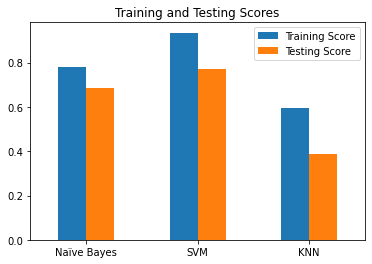

In [47]:
trainScores = [naiveByes_clf.score(X_train,y_train), svc.score(X_train,y_train), knn.score(X_train,y_train)]
testScores = [NBC_accuracy, svc_accuracy, knn_accuracy]
indices = ['Naïve Bayes', 'SVM', 'KNN']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(rot=0)
plt.title('Training and Testing Scores')

In [51]:
NBC_prediction = naiveByes_clf.predict(X_valid)
svc_prediction = svc.predict(X_valid)
knn_prediction = knn.predict(X_valid)
predVals = pd.DataFrame(data={'truth': y_valid, 'Naïve Bayes': NBC_prediction, 'SVM': svc_prediction, 'knn': knn_prediction})

[Text(0.5, 1.0, 'Naïve Bayes')]

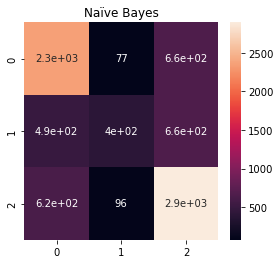

In [54]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_valid, NBC_prediction), annot=True).set(title='Naïve Bayes')

[Text(0.5, 1.0, 'SVM')]

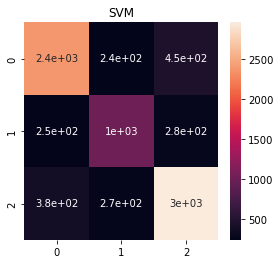

In [55]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_valid, svc_prediction), annot=True).set(title='SVM')

[Text(0.5, 1.0, 'KNN')]

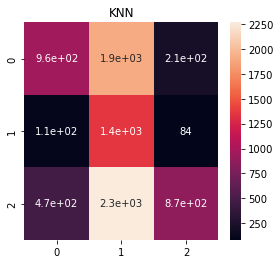

In [56]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_valid, knn_prediction), annot=True).set(title='KNN')

# Reporting the Model with the 'Best Accuracy'

## SVM has the best accuracy.

### THANK YOU  